In [13]:
import pickle
import matplotlib.pyplot as plt
import xobjects as xo
import xtrack as xt
import xcoll as xc
import xpart as xp
from madxtools.particles import *
from pybt.tools.particles import *
from madxtools.plot_tool import *

In [14]:

with open('twiss_scattered.pickle', 'rb') as f:
    twiss_scattered = pickle.load(f)

with open('xsuite_line.p', 'rb') as f:
    line = pickle.load(f)

with open('xsuite_tw.p', 'rb') as f:
    tw_s = pickle.load(f)

# with open('xsuite_emitt.p', 'rb') as f:
#     emitt = pickle.load(f)


In [15]:
s_list = []
betax_list = []
alphax_list = []
gammax_list = []
epsilonx_list = []
betay_list = []
alphay_list = []
gammay_list = []
epsilony_list = []

for i in range(len(line.record_last_track.s[0,:])):
    s_list.append(line.record_last_track.s[:,i][0])
    x = line.record_last_track.x[:,i]
    px = line.record_last_track.px[:,i]

    parms = get_parms(x, px)
    betax_list.append(parms["beta"])
    alphax_list.append(parms["alpha"])
    gammax_list.append(parms["cov"])
    epsilonx_list.append(parms["eps"])

    y = line.record_last_track.y[:,i]
    py = line.record_last_track.py[:,i]
    parms = get_parms(y, py)
    betay_list.append(parms["beta"])
    alphay_list.append(parms["alpha"])
    gammay_list.append(parms["cov"])
    epsilony_list.append(parms["eps"])
    


In [16]:
epsilonx_list

[3.0062898835048095e-07,
 3.0062898835048095e-07,
 3.006289883503735e-07,
 3.0062898835043796e-07,
 3.0062898835039497e-07,
 3.0062898835043796e-07,
 3.00628988350352e-07,
 3.0062898835041467e-07,
 3.0062898835041467e-07,
 3.0062898835041467e-07,
 6.051300374448434e-07,
 6.051300374448434e-07,
 6.051300374448446e-07,
 6.051300374448446e-07]

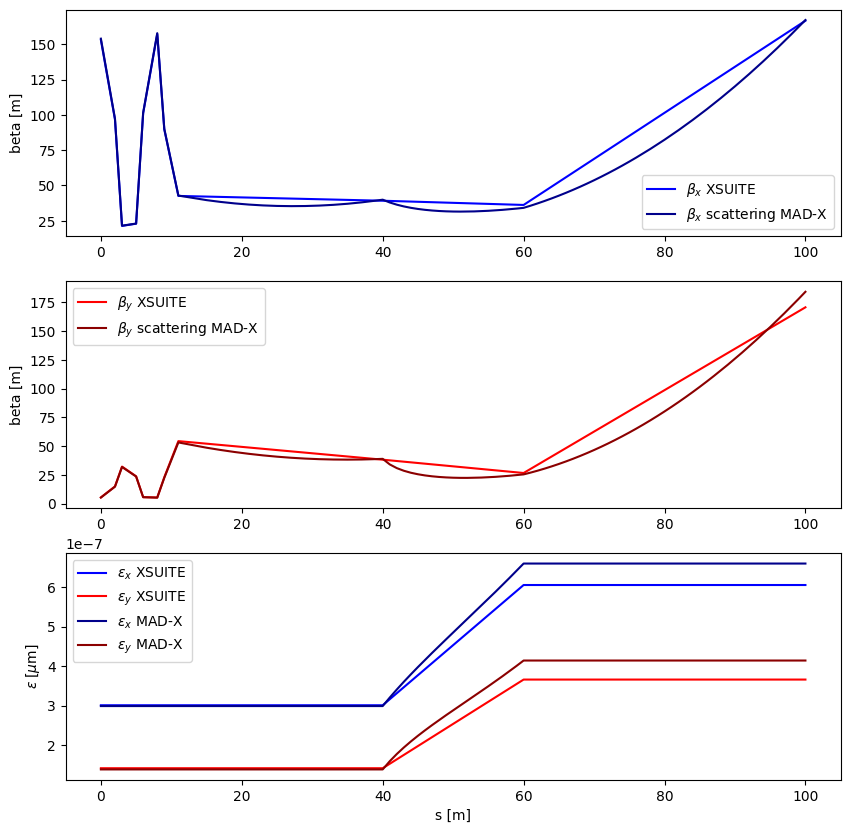

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(tw_s, betax_list, c="b", label=r'$\beta_{x}$ XSUITE')
ax[0].plot(twiss_scattered.s, twiss_scattered.betx, c="darkblue", label=r'$\beta_{x}$ scattering MAD-X')
ax[0].set_ylabel('beta [m]')
ax[0].legend()

ax[1].plot(tw_s, betay_list, c="r", label=r'$\beta_{y}$ XSUITE')
ax[1].plot(twiss_scattered.s, twiss_scattered.bety, c="darkred", label=r'$\beta_{y}$ scattering MAD-X')
ax[1].set_ylabel('beta [m]')
ax[1].legend()

gamma = 25.57893419493347
ax[2].plot(tw_s, epsilonx_list, c="b", label=r'$\epsilon_{x}$ XSUITE')
ax[2].plot(tw_s, epsilony_list, c="r", label=r'$\epsilon_{y}$ XSUITE')
ax[2].plot(twiss_scattered.s, twiss_scattered.ex, c="darkblue", label=r'$\epsilon_{x}$ MAD-X')
ax[2].plot(twiss_scattered.s, twiss_scattered.ey, c="darkred", label=r'$\epsilon_{y}$ MAD-X')
ax[2].set_ylabel(r"$\epsilon\; [\mu\mathrm{m}]$")
ax[2].set_xlabel("s [m]")
ax[2].legend()

(-0.04, 0.04)

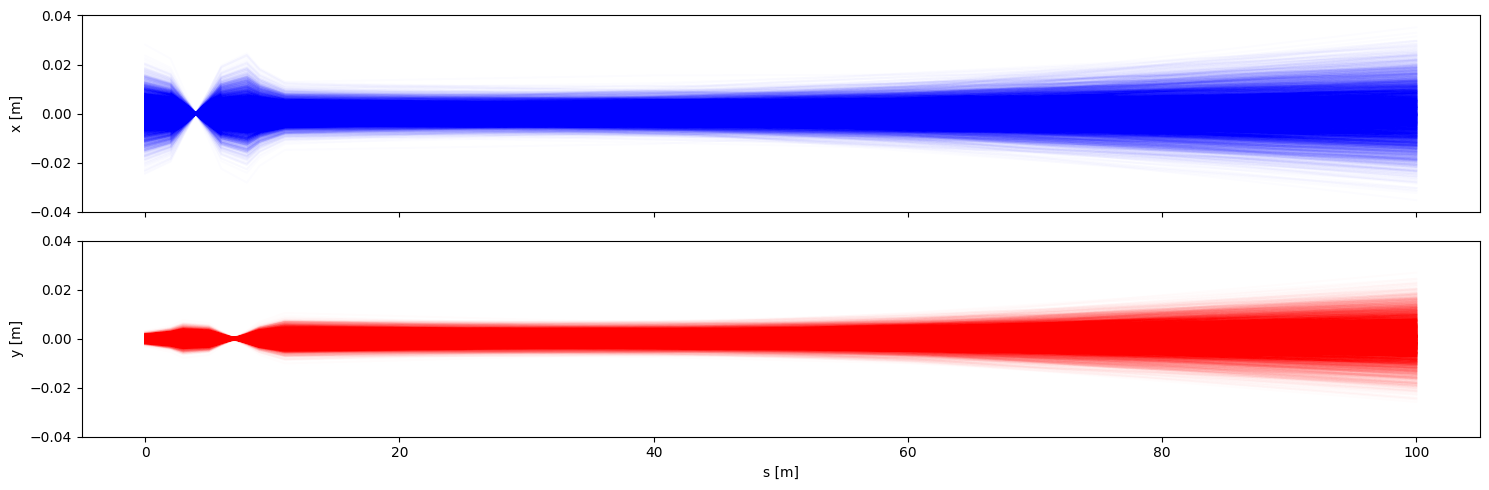

In [18]:
fig,ax = plt.subplots(2,1, figsize=(15,5), tight_layout=True, sharex=True)

for i in range(len(line.record_last_track.s)):
    ax[0].plot(line.record_last_track.s[i], line.record_last_track.x[i], color='blue', alpha=0.01);
    ax[1].plot(line.record_last_track.s[i], line.record_last_track.y[i], color='red', alpha=0.01);

ax[0].set_ylabel('x [m]')
ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('y [m]')

ax[0].set_ylim(-0.04, 0.04)
ax[1].set_ylim(-0.04, 0.04)

In [19]:
# from pybt.tools.plotters import *
# fig, ax = plt.subplots(3,1, figsize=(12, 6), sharex=True, height_ratios=[1, 4, 4, ], tight_layout=True)
# draw_synoptic(ax[0], twiss_scattered)

# ax[1].plot(twiss_scattered.s, twiss_scattered.betx, c="b", label=r'$\beta_{x}$ scattering')
# ax[1].plot(twiss_scattered.s, twiss_scattered.bety, c="r", label=r'$\beta_{y}$ scattering')
# ax[1].set_ylabel(r'$\beta$ [m]')


# ax[2].plot(twiss_scattered.s, twiss_scattered.ex, c="b",  label='$e_{x}$ scattering')
# ax[2].plot(twiss_scattered.s, twiss_scattered.ey, c="r",  label='$e_{y}$ scattering')
# ax[2].set_ylabel('e [m]')



# ax[1].plot(tw.s, tw.betx, label=r'$\beta_{x}$ scattering xsuite')
# ax[1].plot(tw.s, tw.bety, label=r'$\beta_{y}$ scattering xsuite')

# s = [0, 20, 30, 50, 60, 100]
# beta = 0.99
# gamma = 25.606 
# ax[2].plot(s, np.array(nemitt_x)/(beta*gamma), label='H xsuite')
# ax[2].plot(s, np.array(nemitt_y)/(beta*gamma), label='V xsuite')

# ax[1].legend()
# ax[2].legend()

# Compare beam sizes

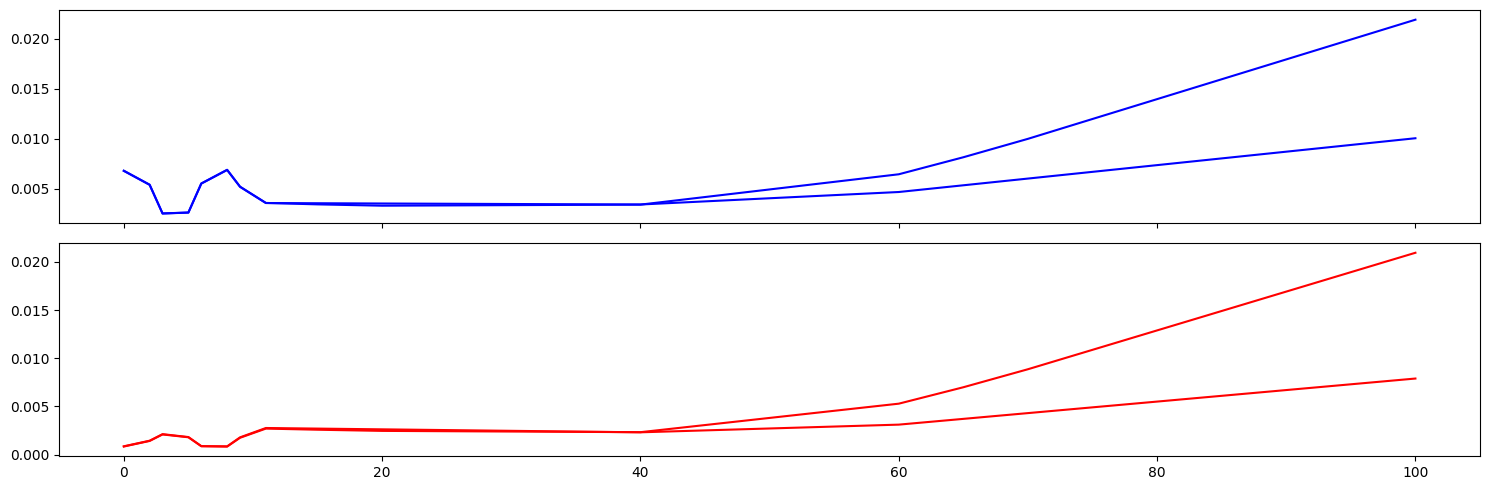

In [20]:
with open('xsuite_beam_size.p', 'rb') as f:
    df_xsuite = pickle.load(f)

with open('exploring_everest/xsuite_beam_size_full_int.p', 'rb') as f:
    df_xsuite_full_int = pickle.load(f)

fig,ax = plt.subplots(2,1, figsize=(15,5), tight_layout=True, sharex=True)
ax[0].plot(df_xsuite.s, df_xsuite.sigH, c="b")
ax[1].plot(df_xsuite.s, df_xsuite.sigV, c="r")

ax[0].plot(df_xsuite_full_int.s, df_xsuite_full_int.sigH, c="b")
ax[1].plot(df_xsuite_full_int.s, df_xsuite_full_int.sigV, c="r")

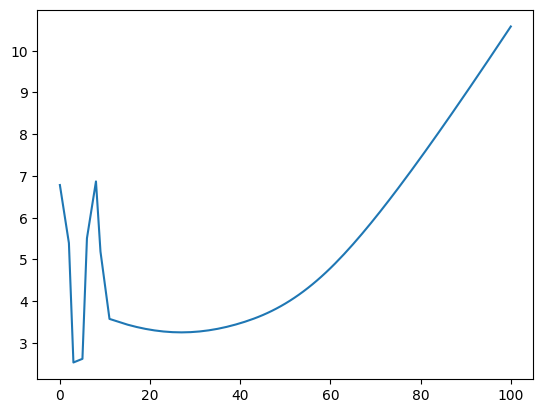

In [21]:
with open('data/df_analytic_sigma_air.pickle', 'rb') as f:
    df_madx = pickle.load(f)

fig, ax = plt.subplots()
ax.plot(df_madx.s, df_madx.sigmaH)

In [22]:
with open('data/FLUKA_data/airscattering.pickle', 'rb') as f:
    df_fluka_options = pickle.load(f)

/Users/eliottjohnson/git_repos/venv3_9/lib/python3.9/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])


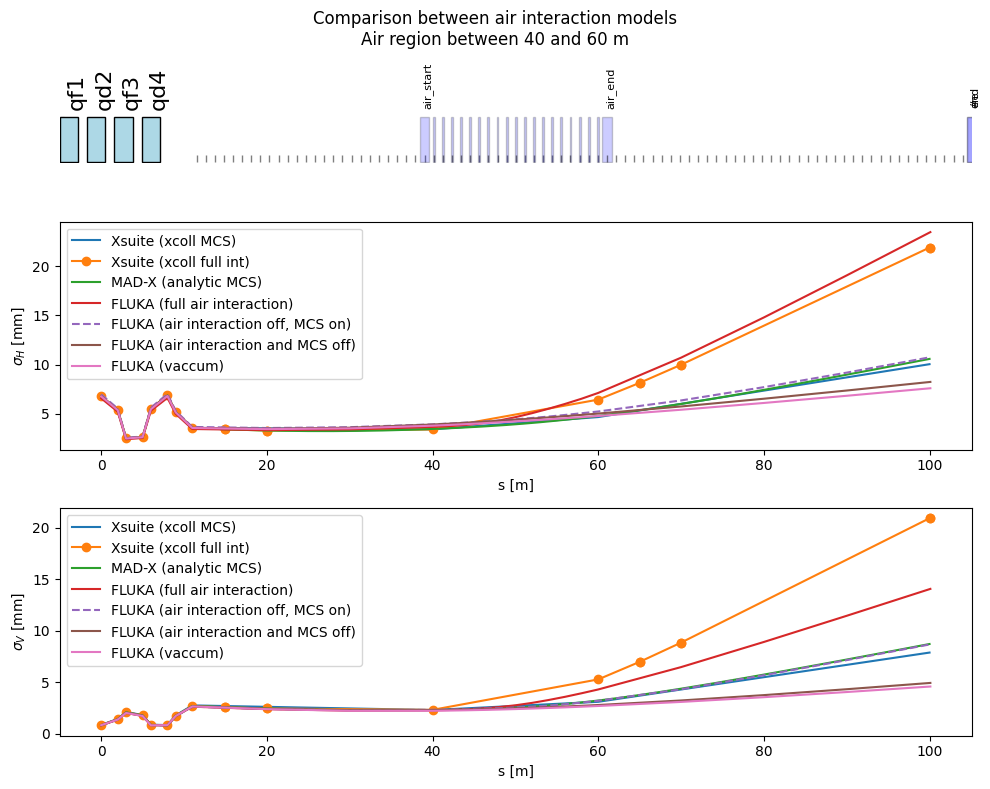

In [23]:
with open('fluka_beam_size.p', 'rb') as f:
    df = pickle.load(f)

fig, ax = plt.subplots(3,1, figsize=(10,8), tight_layout=True, height_ratios=[1, 3, 3])

draw_synoptic(ax[0], twiss_scattered)

# color = ["b", "r"]
# linestyle = ["-",":"]
# i = 0
# for scat_type in ["air", "vacuum"]:
#     c = color[i]
#     ls = linestyle[i]
#     df_mini = df.loc[df.scat_type == scat_type]
#     ax[0].plot(df_mini.s/100, df_mini.sigmaH, c=c, label=scat_type+" Fluka", ls=ls)
#     ax[1].plot(df_mini.s/100, df_mini.sigmaV, c=c, label=scat_type+" Fluka", ls=ls)
#     i+=1

ax[1].plot(df_xsuite.s, df_xsuite.sigH*1000, label="Xsuite (xcoll MCS)")
ax[2].plot(df_xsuite.s, df_xsuite.sigV*1000, label="Xsuite (xcoll MCS)")

ax[1].plot(df_xsuite_full_int.s, df_xsuite_full_int.sigH*1000, marker="o", label="Xsuite (xcoll full int)")
ax[2].plot(df_xsuite_full_int.s, df_xsuite_full_int.sigV*1000, marker="o", label="Xsuite (xcoll full int)")

ax[1].plot(df_madx.s, df_madx.sigmaH, label="MAD-X (analytic MCS)")
ax[2].plot(df_madx.s, df_madx.sigmaV, label="MAD-X (analytic MCS)")

#FLUKA options
ax[1].plot(df_fluka_options.Dist, df_fluka_options.X_air*10, label="FLUKA (full air interaction)")
ax[1].plot(df_fluka_options.Dist, df_fluka_options.X_intoff*10, ls ="--", label="FLUKA (air interaction off, MCS on)")
ax[1].plot(df_fluka_options.Dist, df_fluka_options.X_int_mcsoff*10, label="FLUKA (air interaction and MCS off)")
ax[1].plot(df_fluka_options.Dist, df_fluka_options.X_vac*10, label="FLUKA (vaccum)")

ax[2].plot(df_fluka_options.Dist, df_fluka_options.Y_air*10, label="FLUKA (full air interaction)")
ax[2].plot(df_fluka_options.Dist, df_fluka_options.Y_intoff*10, ls ="--", label="FLUKA (air interaction off, MCS on)")
ax[2].plot(df_fluka_options.Dist, df_fluka_options.Y_int_mcsoff*10, label="FLUKA (air interaction and MCS off)")
ax[2].plot(df_fluka_options.Dist, df_fluka_options.Y_vac*10, label="FLUKA (vaccum)")

ax[1].set_xlabel("s [m]")
ax[1].set_ylabel(r"$\sigma_{H}$ [mm]")
ax[1].legend(loc="upper left")
# ax[0].set_ylim(0, 3)

ax[2].set_xlabel("s [m]")
ax[2].set_ylabel(r"$\sigma_{V}$ [mm]")
ax[2].legend()
# ax[1].set_ylim(0, 3)

fig.suptitle("Comparison between air interaction models\nAir region between 40 and 60 m")

plt.savefig("compare_simulation.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

/Users/eliottjohnson/git_repos/venv3_9/lib/python3.9/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])


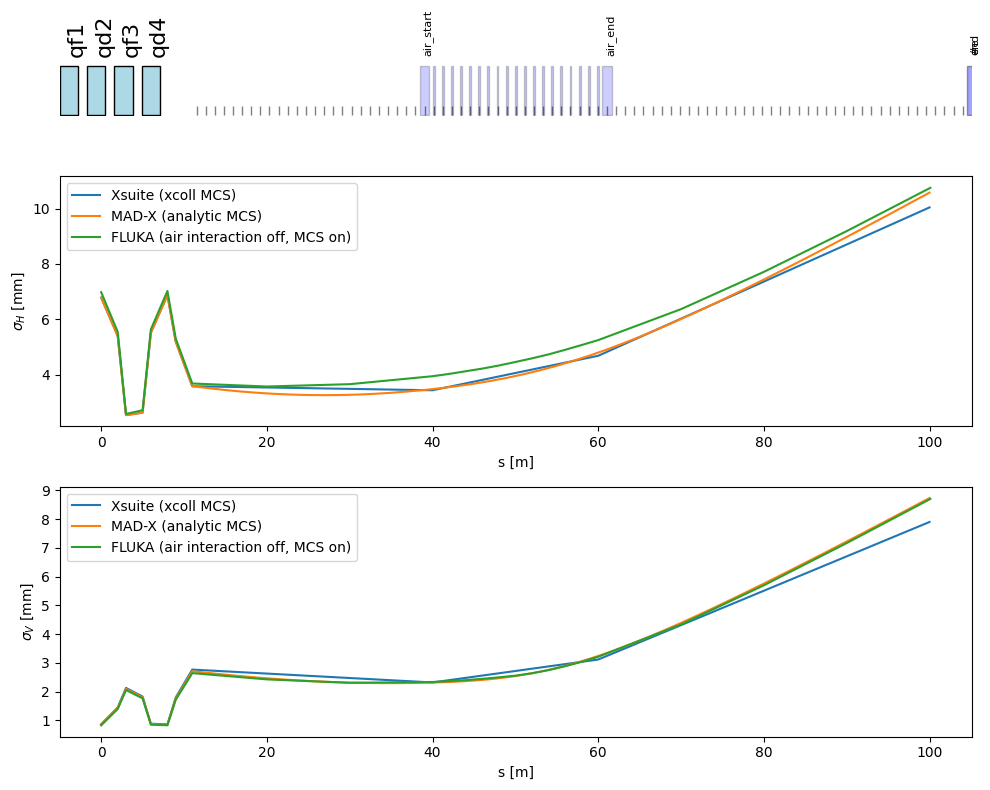

In [24]:
with open('fluka_beam_size.p', 'rb') as f:
    df = pickle.load(f)

fig, ax = plt.subplots(3,1, figsize=(10,8), tight_layout=True, height_ratios=[1, 3, 3])

draw_synoptic(ax[0], twiss_scattered)

# color = ["b", "r"]
# linestyle = ["-",":"]
# i = 0
# for scat_type in ["air", "vacuum"]:
#     c = color[i]
#     ls = linestyle[i]
#     df_mini = df.loc[df.scat_type == scat_type]
#     ax[0].plot(df_mini.s/100, df_mini.sigmaH, c=c, label=scat_type+" Fluka", ls=ls)
#     ax[1].plot(df_mini.s/100, df_mini.sigmaV, c=c, label=scat_type+" Fluka", ls=ls)
#     i+=1

ax[1].plot(df_xsuite.s, df_xsuite.sigH*1000, label="Xsuite (xcoll MCS)")
ax[2].plot(df_xsuite.s, df_xsuite.sigV*1000, label="Xsuite (xcoll MCS)")

ax[1].plot(df_madx.s, df_madx.sigmaH, label="MAD-X (analytic MCS)")
ax[2].plot(df_madx.s, df_madx.sigmaV, label="MAD-X (analytic MCS)")

#FLUKA options

ax[1].plot(df_fluka_options.Dist, df_fluka_options.X_intoff*10, label="FLUKA (air interaction off, MCS on)")


ax[2].plot(df_fluka_options.Dist, df_fluka_options.Y_intoff*10, label="FLUKA (air interaction off, MCS on)")



ax[1].set_xlabel("s [m]")
ax[1].set_ylabel(r"$\sigma_{H}$ [mm]")
ax[1].legend(loc="upper left")
# ax[0].set_ylim(0, 3)

ax[2].set_xlabel("s [m]")
ax[2].set_ylabel(r"$\sigma_{V}$ [mm]")
ax[2].legend()
# ax[1].set_ylim(0, 3)

# fig.suptitle("Comparison between Multiple Coulomb Scattering (MCS) models\nAir region between 40 and 60 m")

plt.savefig("compare_simulation_MCS.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')